In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The idea is drawing two overlapping distributions.

Strategies? Cómo las modelo?
Cómo hago un histograma acorde a una distribución normal?
Cómo coloreo una distribución normal?

Probablemente funcione el fill_between

Probar ax.fill

In [183]:
def normal_distribution(mu, sigma):
    return lambda x: 1 / (np.sqrt(2*np.pi*(sigma**2))) * np.e ** ((-(x - mu)**2)/(2*sigma**2))

In [184]:
def normalize_rbg(c):
    #acum = c[0] + c[1] + c[2] 
    acum = max(c)
    return (float(c[0]/acum), float(c[1]/acum), float(c[2]/acum))

In [252]:
def combine_colors(c1, c2):
    #new_color = (2*c1[0] + c2[0], 2*c1[1] + c2[1], 2*c1[2] + c2[2])
    new_color = (5*c1[0] + 4*c2[0], 5*c1[1] + 4*c2[1], 5*c1[2] + 4*c2[2])
    return normalize_rbg(new_color)

In [240]:
def combine_colors_equally(c1, c2):
    new_color = (c1[0] + c2[0], c1[1] + c2[1], c1[2] + c2[2])
    return normalize_rbg(new_color)

In [241]:
n1 = normal_distribution(0.3, 0.15)
n2 = normal_distribution(0.7, 0.15)

# Main plot

In [298]:
destination_folder = "/Users/lmatayoshi/Desktop/plots_comparativos/"
destination_filename = destination_folder + "eer"

In [275]:
xs = np.linspace(0.0001, 0.999, 500)
true_negatives_ys = n1(xs)
true_positives_ys = n2(xs)
xs = np.insert(xs, 0, 0)
xs = np.append(xs, 1)
true_negatives_ys = np.insert(true_negatives_ys, 0, 0)
true_negatives_ys = np.append(true_negatives_ys, 0)
true_positives_ys = np.insert(true_positives_ys, 0, 0)
true_positives_ys = np.append(true_positives_ys, 0)

In [276]:
false_negatives_xs = np.linspace(0.2, 0.5, 100)
false_negatives_ys = n2(false_negatives_xs)
false_negatives_zeros = np.zeros(false_negatives_ys.shape[0])

In [277]:
false_positives_xs = np.linspace(0.5, 0.8, 100)
false_positives_ys = n1(false_positives_xs)
false_positives_zeros = np.zeros(false_positives_ys.shape[0])

In [278]:
palette = sns.color_palette("hls", 8)
red = palette[0]
blue = palette[5]

In [279]:
blue="#3498db"
red="#e74c3c"

In [286]:
blue=(52.0, 152.0, 219.0)
blue_alternative=(155, 89, 182)
blue=normalize_rbg(blue)
red=(231, 76, 60)
red=normalize_rbg(red)

In [291]:
false_negatives_color = combine_colors(red, blue)
#false_positives_color = combine_colors(blue,red)
#false_positives_color = combine_colors(blue_alternative, red)
false_positives_color = combine_colors_equally(red, blue_alternative)

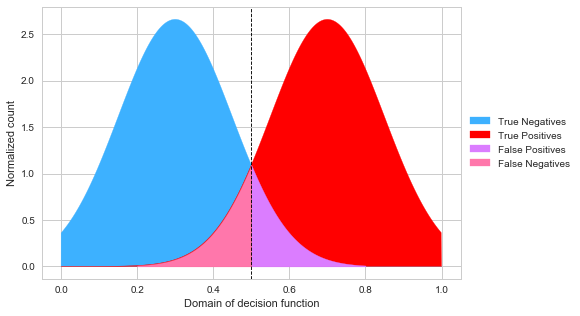

In [302]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.fill(xs, true_negatives_ys, color=blue, label="True Negatives")
ax.fill_between(false_positives_xs, false_positives_zeros, false_positives_ys, color=false_positives_color, zorder=2, label="False Positives")
ax.fill(xs, true_positives_ys, color=red, label="True Positives")
ax.fill_between(false_negatives_xs, false_negatives_zeros, false_negatives_ys, color=false_negatives_color, zorder=2, label="False Negatives")
ax.axvline(x=0.5, color="black", linestyle="--", linewidth=0.9)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.xlabel("Domain of decision function")
plt.ylabel("Normalized count")
plt.savefig(destination_filename)
plt.show()

In [52]:
sns.set(style="white", palette="hls")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(xs, ys_l0, label="P0: Degree 0")
ax.plot(xs, ys_l1, label="P1: Degree 1")
ax.plot(xs, ys_l2, label="P2: Degree 2")
ax.plot(xs, ys_l3, label="P3: Degree 3")
ax.plot(xs, ys_l4, label="P4: Degree 4")
ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")
plt.savefig(destination_folder + "legendre")
plt.show()

5

## Ejemplo usando fill_between con normal distributions

In [47]:
xs_1 = [0, 1, 2, 2.5]
ys_1 = [0, 1, 2, 2]
#fig, ax = plt.subplots()
#xs_2 = [2]
#ys_2 = [3]

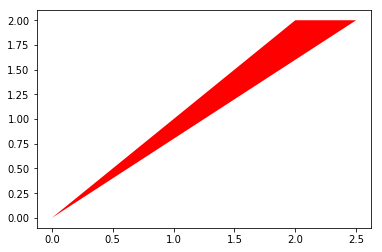

In [48]:
#plt.plot(xs,ys)
plt.fill(xs_1, ys_1, "r")
plt.show()

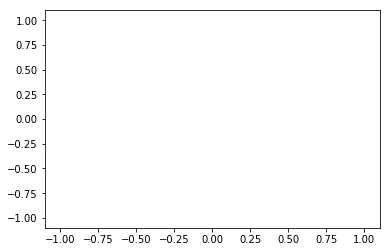

In [42]:
x = np.linspace(-1, 1, 500)
fig, ax = plt.subplots()

#ax.plot(x,x) 
ax.fill(x, x, "r")
plt.show()

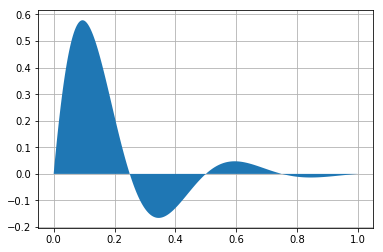

In [17]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()